In [1]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist
import matplotlib.pyplot as plt

#### Dataset info

In [2]:
# source: http://yann.lecun.com/exdb/mnist/
IMAGE_WIDTH = 28
IMAGE_HEIGHT = 28
NUM_CHANNELS = 1
PIXEL_DEPTH = 255
NUM_LABELS = 10

#### Extracting data

In [3]:
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [4]:
TRAIN_IMAGES_NUM = trainX.shape[0]
TEST_IMAGES_NUM = testX.shape[0]

#### Present extracted data

In [5]:
def show_digit(trainX, trainY, index):
    image = trainX[index].reshape([IMAGE_WIDTH, IMAGE_HEIGHT])
    label = trainY[index].argmax(axis=0)
    plt.title("Training data, index: {},  Label: {}".format(index, label))
    plt.imshow(image, cmap="gray_r")
    plt.show()

trainX shape: (55000, 784)
trainY shape: (55000, 10)
testX shape: (10000, 784)
testY shape: (10000, 10)


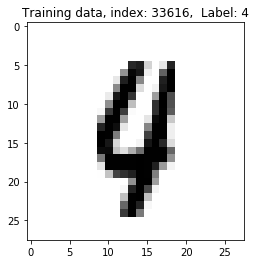

In [18]:
print("trainX shape: " + str(trainX.shape))
print("trainY shape: " + str(trainY.shape))
print("testX shape: " + str(testX.shape))
print("testY shape: " + str(testY.shape))
show_digit(trainX, trainY, np.random.randint(1, TRAIN_IMAGES_NUM + 1))

#### Neural Network preparation

In [57]:
def build_nn_model(input_nodes, h1_nodes, h2_nodes, output_nodes, lr_rate):
    tf.reset_default_graph()

    net = tflearn.input_data([None, input_nodes])

    net = tflearn.fully_connected(net, h1_nodes, activation='ReLU')
    net = tflearn.fully_connected(net, h2_nodes, activation='ReLU')

    net = tflearn.fully_connected(net, output_nodes, activation='softmax')

    net = tflearn.regression(net, 
                             optimizer='sgd', 
                             learning_rate=lr_rate, 
                             loss='categorical_crossentropy') 
        
    return tflearn.DNN(net)

#### Hyperparameters

In [58]:
epochs = 78
b_size = 128
learning_rate = 0.05
validation_set_size = 0.1

input_nodes = IMAGE_WIDTH * IMAGE_HEIGHT
hidden_nodes_1 = 300
hidden_nodes_2 = 75
output_nodes = 10

####  Training

In [59]:
nn_model = build_nn_model(input_nodes, hidden_nodes_1, hidden_nodes_2, output_nodes, learning_rate)

In [60]:
nn_model.fit(trainX, trainY, validation_set=validation_set_size, show_metric=True, batch_size=b_size, n_epoch=epochs)

Training Step: 30185  | total loss: 0.00516 | time: 1.890s
| SGD | epoch: 078 | loss: 0.00516 - acc: 1.0000 -- iter: 49408/49500
Training Step: 30186  | total loss: 0.00526 | time: 2.902s
| SGD | epoch: 078 | loss: 0.00526 - acc: 1.0000 | val_loss: 0.08005 - val_acc: 0.9776 -- iter: 49500/49500
--


In [61]:
predictions = np.array(nn_model.predict(testX)).argmax(axis=1)
targets = testY.argmax(axis=1)

In [62]:
test_accuracy = np.mean(predictions == targets, axis=0)
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9804
